In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [132]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

test_id = test_df['Id']
train_id = train_df['Id']

In [133]:
print(train_df.head())
train_df.shape

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0   1          60       RL         65.0     8450   Pave   NaN      Reg  \
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold   
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2  \
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

(1460, 81)

In [100]:
# Print all label with NaN values
for col in train_df.columns:
    if train_df[col].isna().sum() > 0:
        print(col, train_df[col].isna().sum())

LotFrontage 259
Alley 1369
MasVnrType 872
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [101]:
print(train_df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0   1          60       RL         65.0     8450   Pave   NaN      Reg  \
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold   
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2  \
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [102]:
# Convert categorical data to numerical data or just drop them

# Replace NaN values with mean on LotFrontage, MasVnrArea, GarageYrBlt
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean())

# Drop these features
train_df = train_df.dropna(subset=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'Electrical'])

# Map FireplaceQu
fireplacequ_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, None: 0}
train_df['FireplaceQu'] = train_df['FireplaceQu'].replace('NA', None).map(fireplacequ_map)
train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna(6)

# Map GarageType
garagetype_map = {'2Types': 6, 'Attchd': 5, 'Basment': 4, 'BuiltIn': 3, 'CarPort': 2, 'Detchd': 1, None: 0}
train_df['GarageType'] = train_df['GarageType'].replace('NA', None).map(garagetype_map)
train_df['GarageType'] = train_df['GarageType'].fillna(0)

# Map GarageFinish
garagefinish_map = {'Fin': 3, 'RFn': 2, 'Unf': 1, None: 0}
train_df['GarageFinish'] = train_df['GarageFinish'].replace('NA', None).map(garagefinish_map)
train_df['GarageFinish'] = train_df['GarageFinish'].fillna(0)

# Map GarageQual
garagequal_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, None: 0}
train_df['GarageQual'] = train_df['GarageQual'].replace('NA', None).map(garagequal_map)
train_df['GarageQual'] = train_df['GarageQual'].fillna(0)

# Map GarageCond
garagecond_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, None: 0}
train_df['GarageCond'] = train_df['GarageCond'].replace('NA', None).map(garagecond_map)
train_df['GarageCond'] = train_df['GarageCond'].fillna(0)

# Map Alley
alley_map = {'Grvl': 2, 'Pave': 1, None: 0}
train_df['Alley'] = train_df['Alley'].replace('NA', None).map(alley_map)
train_df['Alley'] = train_df['Alley'].fillna(0)

# Map MasVnrType
MasVnrType_map = {'BrkCmn': 4, 'BrkFace': 3, 'CBlock': 2,  'Stone': 1, None: 0}
train_df['MasVnrType'] = train_df['MasVnrType'].replace('NA', None).map(MasVnrType_map)
train_df['MasVnrType'] = train_df['MasVnrType'].fillna(0)

# Map PoolQC
poolqc_map = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, None: 0}
train_df['PoolQC'] = train_df['PoolQC'].replace('NA', None).map(poolqc_map)
train_df['PoolQC'] = train_df['PoolQC'].fillna(0)

# Map Fence
fence_map = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2,  'MnWw': 1, None: 0}
train_df['Fence'] = train_df['Fence'].replace('NA', None).map(fence_map)
train_df['Fence'] = train_df['Fence'].fillna(0)

# Map MiscFeature
miscFeature_map = {'Elev': 5, 'Gar2': 4, 'Othr': 3,  'Shed': 2, 'TenC': 1, None: 0}
train_df['MiscFeature'] = train_df['MiscFeature'].replace('NA', None).map(miscFeature_map)
train_df['MiscFeature'] = train_df['MiscFeature'].fillna(0)

In [103]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0.0,Reg,Lvl,AllPub,...,0,0.0,0.0,0.0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0.0,Reg,Lvl,AllPub,...,0,0.0,0.0,0.0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0.0,IR1,Lvl,AllPub,...,0,0.0,0.0,0.0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0.0,IR1,Lvl,AllPub,...,0,0.0,0.0,0.0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0.0,IR1,Lvl,AllPub,...,0,0.0,0.0,0.0,0,12,2008,WD,Normal,250000


In [104]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

category_features = []
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        category_features.append(col)
print(category_features)

numeric_features = []
for col in train_df.columns:
    if train_df[col].dtype != 'object' and col != 'SalePrice' and col != 'Id':
        numeric_features.append(col)
        
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), category_features)])

# Split into features and targets
X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']

# Preprocess the features
X = preprocessor.fit_transform(X)

# Get the column names for the one-hot encoded features
onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=category_features)

# Combine the numeric and one-hot encoded feature names
all_feature_names = numeric_features + list(onehot_columns)

# Convert the transformed matrix X back into a DataFrame with the feature names. Pandas provides functions for explorarory data analysis.
X = pd.DataFrame(X, columns=all_feature_names)

print(X.head())

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']
   MSSubClass  LotFrontage   LotArea     Alley  OverallQual  OverallCond   
0    0.075750    -0.230858 -0.207565 -0.246794     0.629142    -0.533001  \
1   -0.870914     0.442867 -0.093716 -0.246794    -0.106757     2.170075   
2    0.075750    -0.096113  0.069632 -0.246794     0.629142    -0.533001   
3    0.312416    -0.455433 -0.098666 -0.246794     0.629142    -0.533001   
4    0.075750     0.622527  0.367618 -0.246794     1.365041    -0.533001   

   YearBuilt  YearRemodAdd  MasVnrType  MasVnrArea  ...  SaleType_ConLw   
0   1.034570      

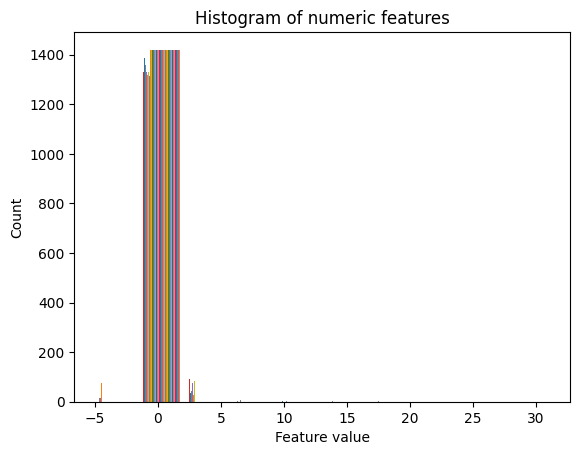

<Axes: >

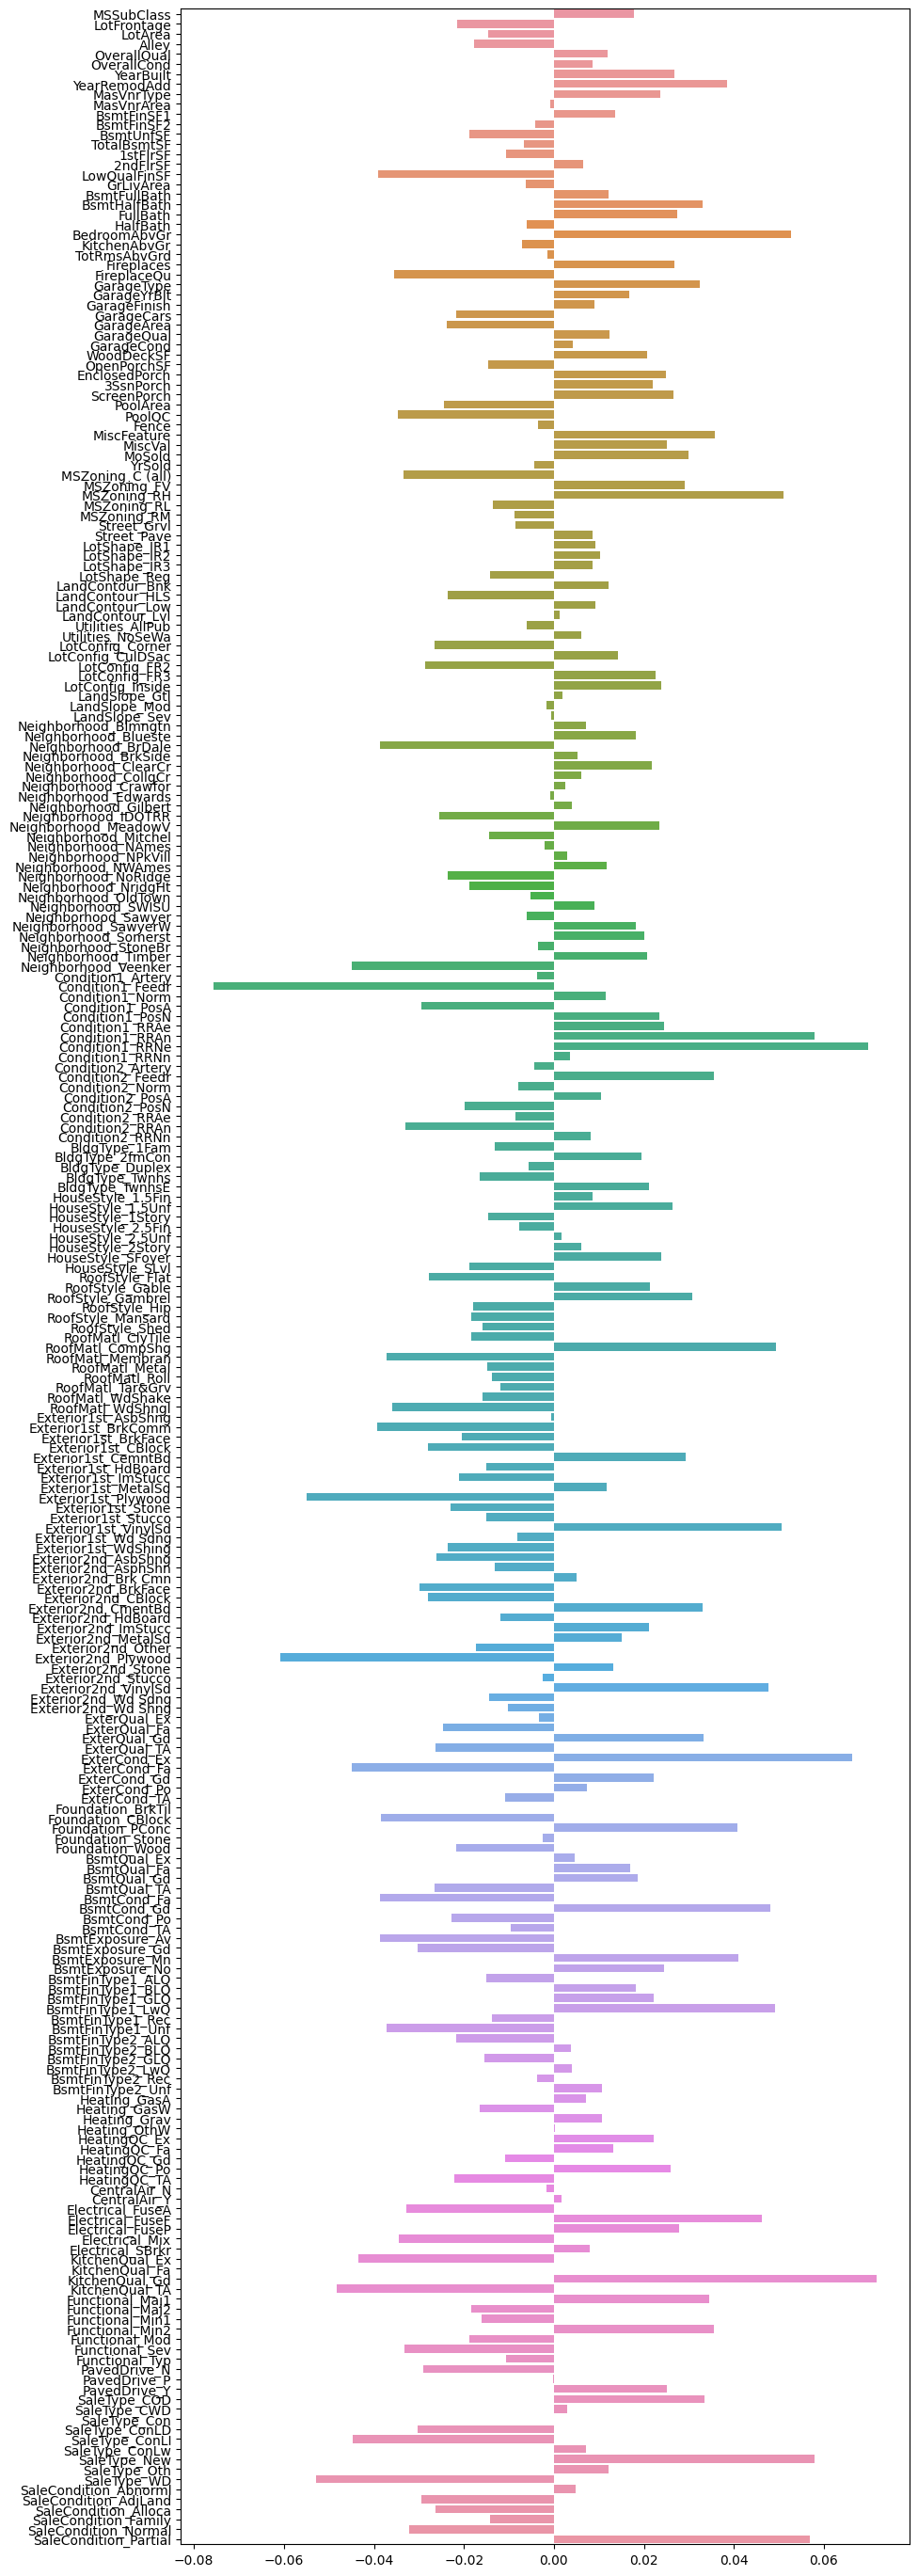

In [105]:
# Graph the column names and their correlation with SalePrice

plt.hist(X)
plt.title('Histogram of numeric features')
plt.xlabel('Feature value')
plt.ylabel('Count')
plt.show()

# Get correlations between features and target variable
corr = X.assign(y=y).corr()['y']

# drop last value since it is the correlation with itself
corr = corr[:-1]
ax, fig = plt.subplots(figsize=(10, 35))
# ds = pd.Series({'x': corr.index, 'y': corr.values})
sns.barplot(x=corr.values, y=corr.index)


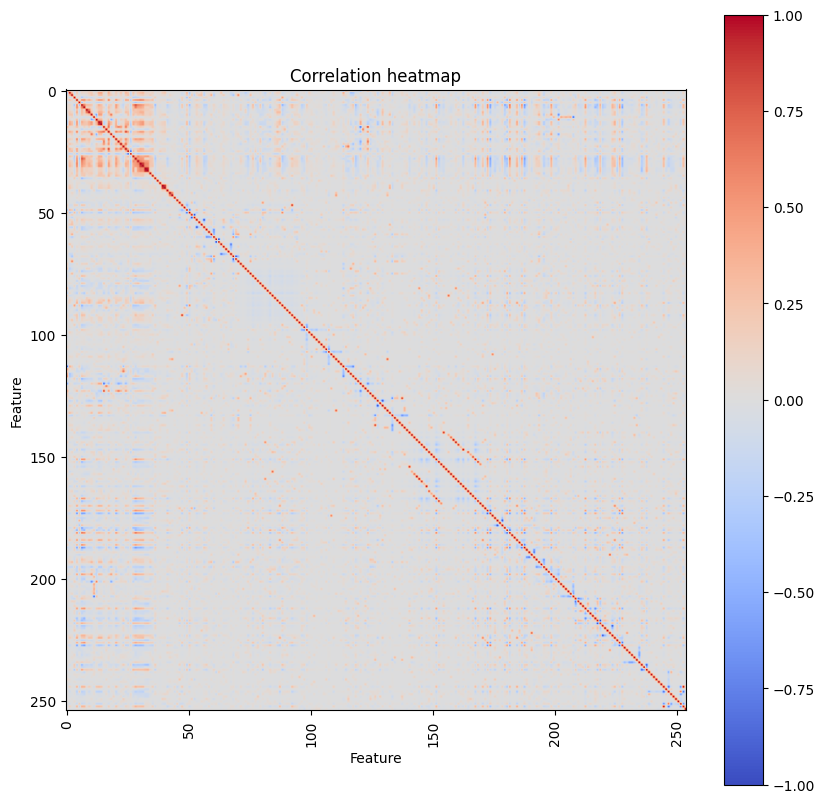

In [106]:
# Now let's create a heatmap of the correlations between features and target variable
corr = X.assign(y=y).corr()
plt.figure(figsize=(10, 10))
plt.title('Correlation heatmap')
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.show()

In [107]:
from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)



In [108]:
# Filter out features with low variance

sel = VarianceThreshold(threshold=(.8))

sel.fit(X_train)
sel.transform(X_train)
sel.get_support(indices=True)

# Print out labels of selected features
print(X_train.columns[sel.get_support(indices=True)])
filterLabels = X_train.columns[sel.get_support(indices=True)]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Alley', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrType', 'MasVnrArea',
       'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'Fence', 'MoSold', 'YrSold'],
      dtype='object')


In [109]:
# Embedded
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train, y_train)
print('Training accuracy:', lr.score(X_train, y_train))
print('Test accuracy:', lr.score(X_test, y_test))

print('Intercept:', lr.intercept_)
np.set_printoptions(8)

# Print out labels of selected features
print(X_train.columns[lr.coef_[0]!=0])
embeddedLabels = X_train.columns[lr.coef_[0]!=0]

Training accuracy: 0.8626760563380281
Test accuracy: 0.017605633802816902
Intercept: [-0.07706884  0.         -0.74670093 -0.04224492 -1.99117951 -0.33800722
 -0.17550893 -1.87659452 -1.464562   -1.121832   -0.40650843 -1.19331324
  0.         -0.13169358 -2.41545168 -0.32041074 -0.79140008 -1.68140686
 -1.44144769 -2.39722562 -1.65164936 -0.35388621 -1.21210748 -0.43741571
 -0.51717133 -2.44001971 -0.99071053 -1.98378056 -2.13279873 -1.17960613
 -1.31699602 -1.32764502 -1.5492171  -0.77266935 -1.337967    0.
 -1.50452886 -1.05319419 -2.72454393 -0.63039262 -2.4553444  -1.65827404
 -1.17496165  0.         -0.57108865 -1.76768058 -0.77731351 -1.42054843
 -2.03248519  0.         -1.21503223 -2.60894508 -0.5569403  -0.16854769
 -1.1379588  -0.53995592 -2.18781448 -1.77074047 -2.54311049 -0.94469884
 -0.33723978  0.         -1.06202741 -0.78182342 -1.31521075 -2.6193061
 -0.32882393 -2.78339805 -2.45092721 -1.81625061  0.         -0.73969335
 -0.07612936 -2.47046729 -0.44106765 -0.79699547

In [110]:
# Wrapper
from sklearn.feature_selection import RFE

lr = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', multi_class='ovr')
rfe = RFE(lr, n_features_to_select=20, step=1)

X_train_sub = rfe.fit_transform(X_train, y_train)

In [111]:
rfe.support_
# print out features
print(X_train.columns[rfe.support_])
wrapperLabels = X_train.columns[rfe.support_]

Index(['YearRemodAdd', 'HalfBath', 'FireplaceQu', 'GarageType', 'YrSold',
       'MSZoning_RL', 'Street_Pave', 'LotShape_Reg', 'Utilities_AllPub',
       'LandSlope_Gtl', 'Condition1_Norm', 'Condition2_Norm', 'BldgType_1Fam',
       'RoofMatl_CompShg', 'BsmtCond_TA', 'BsmtFinType2_Unf', 'Heating_GasA',
       'Electrical_SBrkr', 'Functional_Typ', 'SaleType_WD'],
      dtype='object')


In [112]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
pca.fit(X_train)

X_pca = pca.transform(X_train)
print("Original shape: {}".format(str(X_train.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (284, 253)
Reduced shape: (284, 20)


In [113]:
print("PCA component shape: {}".format(pca.components_.shape))

# Print labels of selected features
print(X_train.columns[pca.components_[0]!=0])
pcaLabels = X_train.columns[pca.components_[0]!=0]

PCA component shape: (20, 253)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Alley', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrType', 'MasVnrArea',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=223)


In [134]:
from sklearn.model_selection import train_test_split

df = pd.concat((train_df, test_df))

# Need to clean the data
df["Exterior2nd"] = df["Exterior2nd"].replace({"Brk Cmn": "BrkComm"})
df["GarageYrBlt"] = df["GarageYrBlt"].where(df.GarageYrBlt <= 2010, df.YearBuilt)

# Replace features that begin with a number with the string equivalent
df.rename(columns={"1stFlrSF": "FirstFlrSF", "2ndFlrSF": "SecondFlrSF", "3SsnPorch": "ThreeSsnPorch"}, inplace=True)

# List all the features names
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'FirstFlrSF', 'SecondFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Paved

In [135]:
# Convert categorical features to numeric

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes

print(df.head())

   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape   
0   1          60         3         65.0     8450       1     -1         3  \
1   2          20         3         80.0     9600       1     -1         3   
2   3          60         3         68.0    11250       1     -1         0   
3   4          70         3         60.0     9550       1     -1         0   
4   5          60         3         84.0    14260       1     -1         0   

   LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal   
0            3          0  ...         0      -1     -1           -1        0  \
1            3          0  ...         0      -1     -1           -1        0   
2            3          0  ...         0      -1     -1           -1        0   
3            3          0  ...         0      -1     -1           -1        0   
4            3          0  ...         0      -1     -1           -1        0   

   MoSold  YrSold  SaleType  SaleCondition  

In [136]:
# For missing numeric values, fill with the mean of the column

for col in df.columns:
    if df[col].dtype != 'object' and col != 'SalePrice' and col != 'Id':
        df[col] = df[col].fillna(df[col].mean())

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,-1,3,3,0,...,0,-1,-1,-1,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,-1,3,3,0,...,0,-1,-1,-1,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,-1,0,3,0,...,0,-1,-1,-1,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,-1,0,3,0,...,0,-1,-1,-1,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,-1,0,3,0,...,0,-1,-1,-1,0,12,2008,8,4,250000.0


In [137]:
# Convert cataegorical features to numeric

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,-1,3,3,0,...,0,-1,-1,-1,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,-1,3,3,0,...,0,-1,-1,-1,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,-1,0,3,0,...,0,-1,-1,-1,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,-1,0,3,0,...,0,-1,-1,-1,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,-1,0,3,0,...,0,-1,-1,-1,0,12,2008,8,4,250000.0


In [138]:
# Checking for missing values

for col in df.columns:
    if df[col].dtype != 'object' and col != 'SalePrice' and col != 'Id':
        if df[col].isnull().sum() > 0:
            print(col, df[col].isnull().sum())

In [141]:
train_df = df.loc[train_df.index, :]
test_df = df.loc[test_df.index, :]